In [1]:
# Natural Language Processing is dealing with text data. Text is unsupervised learning data.
# Text data in the form of documents, pdf, html webpages, social medai posts, xml documents,etc are
# widely used as source of data.
# more than 60% of data is text data.

# Text data preprocessing is the most challenging task. Preprocessing involves cleaning or removing
# special characters, punctuations, emojis, digits, white spaces, stop words(is,a,an,the,etc.).
# Text data can be imported directly into python and preprpocessing to be done.

# Text data must be converted into a matrix of numbers for algorithms to process.
# Text is analyzed as sentences or words/tokens.

# Libraries for text mining and NLP are - nltk, spacy, textblob,wordcloud

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [61]:
import nltk

In [1]:
import io
%cd "C:\Users\hp\Downloads"

C:\Users\hp\Downloads


In [4]:
reviews = pd.read_csv("7817_1.csv")

In [5]:
reviews

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,3.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,This is not the same remote that I got for my ...,I would be disappointed with myself if i produ...,NaN,NaN,GregAmandawith4,NaN,NaN,4 ounces
1593,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,I have had to change the batteries in this rem...,Battery draining remote!!!!,NaN,NaN,Amazon Customer,NaN,NaN,4 ounces
1594,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,1.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,"Remote did not activate, nor did it connect to...",replacing an even worse remote. Waste of time,NaN,NaN,Amazon Customer,NaN,NaN,4 ounces
1595,AVpfo9ukilAPnD_xfhuj,B00NO8JJZW,Amazon,"Amazon Devices & Accessories,Amazon Device Acc...",NaN,2016-04-02T14:40:43Z,2017-08-13T08:28:46Z,NaN,NaN,alexavoiceremoteforamazonfiretvfiretvstick/b00...,...,3.0,https://www.amazon.com/Alexa-Voice-Remote-Amaz...,It does the job but is super over priced. I fe...,Overpriced,NaN,NaN,Meg Ashley,NaN,NaN,4 ounces


In [6]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1597 non-null   object 
 1   asins                 1597 non-null   object 
 2   brand                 1597 non-null   object 
 3   categories            1597 non-null   object 
 4   colors                774 non-null    object 
 5   dateAdded             1597 non-null   object 
 6   dateUpdated           1597 non-null   object 
 7   dimension             565 non-null    object 
 8   ean                   898 non-null    float64
 9   keys                  1597 non-null   object 
 10  manufacturer          965 non-null    object 
 11  manufacturerNumber    902 non-null    object 
 12  name                  1597 non-null   object 
 13  prices                1597 non-null   object 
 14  reviews.date          1217 non-null   object 
 15  reviews.doRecommend  

In [7]:
reviews1 = reviews[['reviews.text', 'reviews.rating']]

In [8]:
reviews1

,reviews.text,reviews.rating
0,I initially had trouble deciding between the p...,5.0
1,Allow me to preface this with a little history...,5.0
2,I am enjoying it so far. Great for reading. Ha...,4.0
3,I bought one of the first Paperwhites and have...,5.0
4,I have to say upfront - I don't like coroporat...,5.0
...,...,...
1592,This is not the same remote that I got for my ...,3.0
1593,I have had to change the batteries in this rem...,1.0
1594,"Remote did not activate, nor did it connect to...",1.0
1595,It does the job but is super over priced. I fe...,3.0


In [9]:
reviews1['reviews.text'].head()

# Preprocessing
# 1) Convert text to lowercase or smallcaps
# 2) Remove special characters, punctiations, digits,whitespaces, etc.from text

# For preprocessing regular expressions library 're' is used
# re library all functions to preprocess string or text data

0    I initially had trouble deciding between the p...
1    Allow me to preface this with a little history...
2    I am enjoying it so far. Great for reading. Ha...
3    I bought one of the first Paperwhites and have...
4    I have to say upfront - I don't like coroporat...
Name: reviews.text, dtype: object

In [14]:
import warnings
warnings.filterwarnings("ignore")

In [15]:
reviews1['reviews.text']=reviews1['reviews.text'].str.lower()

In [16]:
import re
def clean_text(text):
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\s+)|([0-9])",
                           " ",text).split())

In [17]:
reviews1['reviews.text']=[str(clean_text(x)) for x in reviews1['reviews.text']]

In [18]:
reviews1['reviews.text'].head()

0    i initially had trouble deciding between the p...
1    allow me to preface this with a little history...
2    i am enjoying it so far great for reading had ...
3    i bought one of the first paperwhites and have...
4    i have to say upfront i don t like coroporate ...
Name: reviews.text, dtype: object

In [19]:
# Tokenization - Converting text either into sentences or words
# sent_tokenize - Break text into sentences with default delimiter is fullstop or .
# word_tokenize - Break text into words with default delimiter as space.

In [20]:
from nltk.tokenize import sent_tokenize,word_tokenize

In [23]:
sentences=reviews1['reviews.text'].apply(sent_tokenize)

In [24]:
sentences.head()

0    [i initially had trouble deciding between the ...
1    [allow me to preface this with a little histor...
2    [i am enjoying it so far great for reading had...
3    [i bought one of the first paperwhites and hav...
4    [i have to say upfront i don t like coroporate...
Name: reviews.text, dtype: object

In [25]:
from nltk.corpus import stopwords

In [26]:
stopwords=set(stopwords.words("english"))

In [28]:
reviews1['reviews.text']=reviews1['reviews.text'].apply(lambda x:' '.join([item for item in x.split()
                                                                         if item not in stopwords]))

In [29]:
reviews1['reviews.text'].head()

0    initially trouble deciding paperwhite voyage r...
1    allow preface little history casual reader own...
2    enjoying far great reading original fire since...
3    bought one first paperwhites pleased constant ...
4    say upfront like coroporate hermetically close...
Name: reviews.text, dtype: object

In [30]:
# Sentiment Analysis is done both on senetences and words by comparing them with existing list or
# lexicon of positive, negative and neutral words.

# Text Blob based sentiment analysis provides 2 metrics - polarity and subjectivity

# Polarity lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment.

# Subjectivity quantifies the amount of personal opinion and factual information contained in the text.
# The higher subjectivity means that the text contains personal opinion rather than factual information.

In [32]:
!pip install textblob

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)


In [33]:
from textblob import TextBlob

In [34]:
sent=TextBlob("Sachin Tendulakar is greatest batsman in cricket")

In [35]:
sent.sentiment

Sentiment(polarity=1.0, subjectivity=1.0)

In [36]:
sent2=TextBlob("Sachin Tendulakar is greatest batsman in cricket who scored more than 25000 runs")

In [37]:
sent2.sentiment

Sentiment(polarity=0.75, subjectivity=0.75)

In [38]:
def analyze_sentiment(text):
    analysis=TextBlob(text)
    if analysis.sentiment.polarity>0:
        return 'Positive'
    elif analysis.sentiment.polarity==0:
        return 'Neutral'
    else:
        return 'Negative'

In [39]:
sentences = sentences.map(lambda x: ' '.join([item for item in str(x).split()
                                              if item not in stopwords]))

In [40]:
sentences=pd.DataFrame(sentences)

In [41]:
sentences.columns = ['sentence']

In [42]:
sentences['sentiment']=[str(analyze_sentiment(x)) for x in sentences.sentence]

In [43]:
sentences.sentiment.value_counts(dropna=False)

sentiment
Positive    1481
Negative      72
Neutral       44
Name: count, dtype: int64

In [44]:
pd.set_option('display.max_colwidth', None)
sentences[sentences.sentiment=="Negative"]

,sentence,sentiment
39,['all quit working absolutely way revive battery loses power charged immediately even weeks go hope ever using kindle major flaw'],Negative
96,['major fan buy protection bought cause blend decor skin skin tight yes loose often grab move maybe every year'],Negative
108,['after months tablet longer useable stuck boot screen invested lot amazon movies books stinks'],Negative
152,['major fan buy protection bought cause blend decor skin skin tight yes loose often grab move maybe every year'],Negative
165,['major fan buy protection bought cause blend decor skin skin tight yes loose often grab move maybe every year'],Negative
...,...,...
1590,['voice remote gave nearly year purchased changed batteries several times nothing rely phone app function paid stick promoted prime members want extra might well buy another fire stick rip hollow piece plastic even voice remote feature still think worth amazon sell remote dollars prime members worry fails outside warranty period amazon already charging arm leg prime membership content begin with'],Negative
1592,['this remote got alexa echo control volume think remotes used feature volume pause would disappointed produced remote control volume would make incompetent engineer lazy ceo amazon expect better you'],Negative
1593,['i change batteries remote twice per month since purchased march battery short life span first battery replacement stopped gaming used gaming controller make difference still drained batteries quickly option using phone app home someone else wants use fire tv poor quality product course went warranty days ago guess mindful date recommend product think amazon extend warranty coverage ridiculous remote basically work'],Negative
1594,['remote activate connect box poorly designed remote replacing even worse remote waste time ordered two items pay shipping shipped padded envelope double shipping charges'],Negative


In [46]:
# Word or Token Analysis\
reviewwords=reviews1['reviews.text'].apply(word_tokenize)

In [47]:
reviewwords=[w for w in reviewwords if len(w)>2] # Select words more than 2 characters/alphabets

In [48]:
from nltk.probability import FreqDist
from nltk import flatten

In [49]:
reviewwords=flatten(reviewwords)

In [50]:
wordfreq=FreqDist(reviewwords)

In [51]:
wordfreq.most_common(50)

[('kindle', 1523),
 ('amazon', 1516),
 ('fire', 1399),
 ('like', 1247),
 ('use', 951),
 ('one', 905),
 ('read', 883),
 ('sound', 844),
 ('headphones', 814),
 ('great', 813),
 ('prime', 792),
 ('tv', 791),
 ('device', 780),
 ('would', 727),
 ('tablet', 711),
 ('screen', 666),
 ('apple', 642),
 ('hdx', 626),
 ('well', 616),
 ('hd', 613),
 ('first', 599),
 ('new', 588),
 ('really', 572),
 ('content', 571),
 ('good', 530),
 ('year', 530),
 ('nice', 521),
 ('also', 519),
 ('want', 510),
 ('review', 508),
 ('quality', 494),
 ('get', 491),
 ('time', 487),
 ('much', 473),
 ('better', 464),
 ('easy', 449),
 ('free', 423),
 ('love', 419),
 ('echo', 419),
 ('feel', 415),
 ('ipad', 406),
 ('tap', 405),
 ('product', 404),
 ('features', 396),
 ('music', 388),
 ('roku', 385),
 ('people', 377),
 ('movies', 375),
 ('even', 368),
 ('using', 360)]

In [54]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
  Using cached wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.3-cp311-cp311-win_amd64.whl (300 kB)


In [56]:
from wordcloud import WordCloud

In [57]:
reviewwords=(" ").join(reviewwords)

In [58]:
wordcloud=WordCloud(height=500,width=1000,colormap="plasma").generate(str(reviewwords))

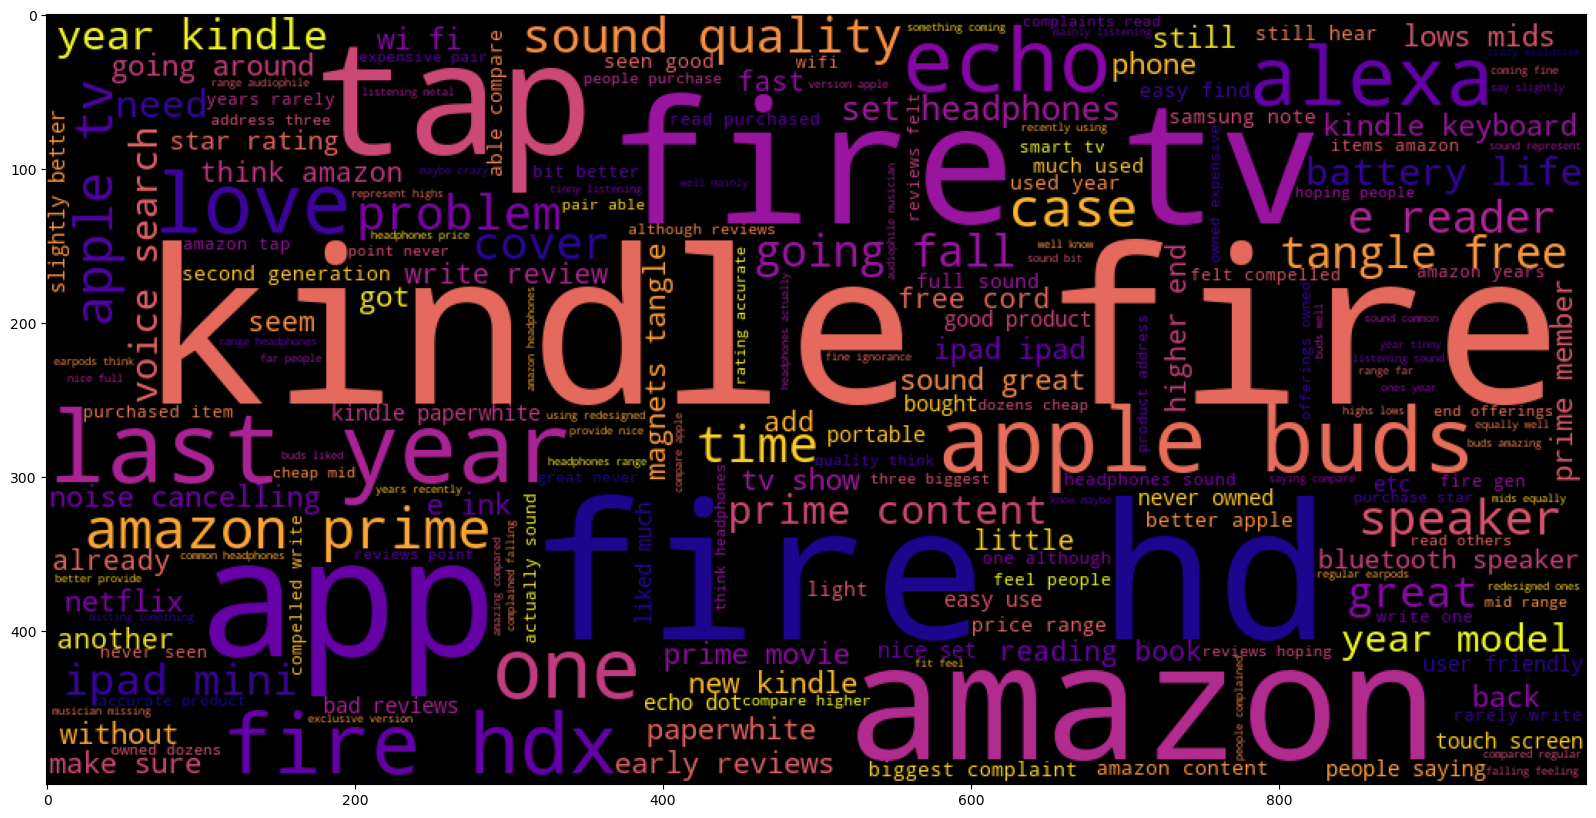

In [59]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.show()

In [62]:
# Part of Speech Tagging-
nltk.pos_tag((
    "Sachin Tendulakar is greatest batsman in cricket who scored more than 25000 runs").split())

# NNP - proper Noun Singular
# VBZ - VBZ verb, 3rd person singular
# IN - preposition/subordinating conjunction
# WP wh-pronoun
# JJR adjective, comparative – ‘bigger’
# JJS adjective, superlative – ‘biggest’

[('Sachin', 'NNP'),
 ('Tendulakar', 'NNP'),
 ('is', 'VBZ'),
 ('greatest', 'JJS'),
 ('batsman', 'NN'),
 ('in', 'IN'),
 ('cricket', 'NN'),
 ('who', 'WP'),
 ('scored', 'VBD'),
 ('more', 'JJR'),
 ('than', 'IN'),
 ('25000', 'CD'),
 ('runs', 'NNS')]